In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iregmap = {
    1 : "PIEMONTE",
    2 : "VALLE_AOSTA",
    3 : "LOMBARDIA",
    4 : "TRENTINO",
    5 : "VENETO",
    6 : "FRIULI",
    7 : "LIGURIA",
    8 : "EMILIA_ROMAGNA",
    9 : "TOSCANA",
    10 : "UMBRIA",
    11 : "MARCHE",
    12 : "LAZIO",
    13 : "ABRUZZO",
    14 : "MOLISE",
    15 : "CAMPANIA",
    16 : "PUGLIA",
    17 : "BASILICATA",
    18 : "CALABRIA",
    19 : "SICILIA",
    20 : "SARDEGNA"
}
def transform(x): return iregmap[x]

In [5]:
# Importiamo il data set.
df = pd.read_csv('output.csv')
df['IREG'] = df['IREG'].apply(transform)
df.head()

,NQUEST,ANNO,Y,Y1,IREG
0,1,1977,NaN,1586.555594,PIEMONTE
1,2,1977,NaN,1305.086584,PIEMONTE
2,3,1977,NaN,4157.478038,PIEMONTE
3,4,1977,NaN,4131.655193,PIEMONTE
4,5,1977,NaN,4251.989650,PIEMONTE


In [6]:
# Questi sono tutti gli anni su cui si hanno informazioni.
np.unique(df['ANNO'])

array([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1986, 1987, 1989,
       1991, 1993, 1995, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

---

In [7]:
# Estraggo dai dati solo i record relativi agli anni che mi interessano.
years = [1995, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]
dfp = df[df.ANNO.isin(years)]

In [8]:
# Importo i pesi e li concateno con i dati.
pesi = pd.read_csv('storico_ascii/peso.csv')
pesi = pesi[pesi.ANNO.isin(years)]
full = pd.concat([dfp, pesi['PESO']], axis=1)
full.head()

,NQUEST,ANNO,Y,Y1,IREG,PESO
68063,25,1995,47520.954342,46687.703678,PUGLIA,1.971756
68064,34,1995,61897.359356,65228.506355,EMILIA_ROMAGNA,0.459048
68065,38,1995,9114.715045,8764.273578,EMILIA_ROMAGNA,0.543176
68066,123,1995,33547.779747,39261.053469,CALABRIA,0.440612
68067,126,1995,12291.674198,12291.674198,CALABRIA,0.383064


<hr>

In [9]:
# Importo i deflatori e li filtro sulla base degli anni che mi interessano.
defl = pd.read_csv('storico_ascii/defl.csv')
defl = defl[defl['Anno'].isin(years)].reset_index(drop = True)
defl = defl.set_index('Anno')
defl

,DEFL,RIVAL
Anno,,
1995,0.705283,1.522789
1998,0.764268,1.405264
2000,0.804857,1.334396
2002,0.849998,1.263530
2004,0.895594,1.199202
2006,0.938408,1.144490
2008,0.989559,1.085329
2010,1.000000,1.073998
2012,1.056974,1.016106


In [10]:
def media_pesata_Y(df, anno):
    sum = 0
    wsum = 0
    data = df[df.ANNO == anno]
    for x in data.itertuples():
        d = defl.loc[anno].DEFL
        r = defl.loc[2010].RIVAL
        sum += ((x.Y / d) * r) * x.PESO
        wsum += x.PESO
    return sum / wsum

In [11]:
def reddito_medio_per_anno():
    result = []
    for y in years: result.append([y, media_pesata_Y(full, y)])
    return result

In [12]:
redditi_medi = reddito_medio_per_anno()
redditi_medi

[[1995, 33588.446842534184],
 [1998, 34932.10913236495],
 [2000, 34779.53989080791],
 [2002, 34755.70691545497],
 [2004, 35297.406040385555],
 [2006, 36187.20301953595],
 [2008, 34709.797409757215],
 [2010, 34914.73754487342],
 [2012, 30632.548588153775],
 [2014, 30597.84553671879],
 [2016, 30714.70580245284]]

In [13]:
# Aggiungo gli anni mancanti.
missing_years = [1996, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017]
for y in missing_years: redditi_medi.append([y, None])
redditi_medi = sorted(redditi_medi)
redditi_medi

[[1995, 33588.446842534184],
 [1996, None],
 [1997, None],
 [1998, 34932.10913236495],
 [1999, None],
 [2000, 34779.53989080791],
 [2001, None],
 [2002, 34755.70691545497],
 [2003, None],
 [2004, 35297.406040385555],
 [2005, None],
 [2006, 36187.20301953595],
 [2007, None],
 [2008, 34709.797409757215],
 [2009, None],
 [2010, 34914.73754487342],
 [2011, None],
 [2012, 30632.548588153775],
 [2013, None],
 [2014, 30597.84553671879],
 [2015, None],
 [2016, 30714.70580245284],
 [2017, None]]

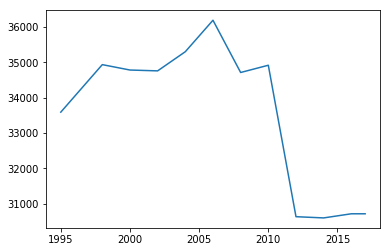

In [14]:
t = pd.DataFrame(redditi_medi)
t[1] = t[1].interpolate(method='linear', limit_direction='forward')
plt.plot(t[0], t[1])

In [15]:
t.columns = ['Anno', 'Reddito']
t['Reddito'] /= 12
#t.to_csv('ITALIA/reddito_medio.csv', index=False, float_format='%.2f')
t

,Anno,Reddito
0,1995,2799.037237
1,1996,2836.361189
2,1997,2873.685142
3,1998,2911.009094
4,1999,2904.652043
5,2000,2898.294991
6,2001,2897.301950
7,2002,2896.308910
8,2003,2918.879706
9,2004,2941.450503


---

In [46]:
# Itero sui nomi delle regioni così...
for x in iregmap.itervalues(): print x

PIEMONTE
VALLE_AOSTA
LOMBARDIA
TRENTINO
VENETO
FRIULI
LIGURIA
EMILIA_ROMAGNA
TOSCANA
UMBRIA
MARCHE
LAZIO
ABRUZZO
MOLISE
CAMPANIA
PUGLIA
BASILICATA
CALABRIA
SICILIA
SARDEGNA


In [55]:
# Fix region and year.
for regione in iregmap.itervalues():
    print regione
    result = []
    for anno in years:
        data = full[full.IREG == regione][full.ANNO == anno]
        rsum = 0
        wsum = 0
        for x in data.itertuples():
            d = defl.loc[anno].DEFL
            r = defl.loc[2010].RIVAL
            rsum += ((x.Y / d) * r) * x.PESO
            wsum += x.PESO
        if (wsum == 0): value = None
        else: value = rsum / wsum
        result.append([anno, value])
    # Build the df and interpolate the values.
    missing_years = [1996, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017]
    for y in missing_years: result.append([y, None])
    result = sorted(result)
    z = pd.DataFrame(result)
    z.columns = ['Anno', 'Reddito']
    z['Reddito'] = z['Reddito'].interpolate(method='linear', limit_direction='forward')
    # Scala tutto per 12
    z['Reddito'] /= 12
    z.to_csv('./REDDITO_PER_REGIONE/'+ regione + '.csv', index=False)

PIEMONTE


/Users/matteo/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


VALLE_AOSTA
LOMBARDIA
TRENTINO
VENETO
FRIULI
LIGURIA
EMILIA_ROMAGNA
TOSCANA
UMBRIA
MARCHE
LAZIO
ABRUZZO
MOLISE
CAMPANIA
PUGLIA
BASILICATA
CALABRIA
SICILIA
SARDEGNA
